## Task 4: Who's the most frequent winner?

In [1]:
import pandas as pd
combats = pd.read_csv('input/combats.csv')
pokemon = pd.read_csv('input/pokemon.csv')
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)

In [2]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

combats_names = combats[cols].replace(names_dict)
#print (combats_names["Winner"].value_counts()[:10])
winners = list(combats_names["Winner"])
#data = [x for x in winners if type(x)!= str]
#print (data)
winners


['Nuzleaf',
 'Terrakion',
 'Beheeyem',
 'Druddigon',
 'Omastar',
 'Joltik',
 'Jynx',
 'Giratina Altered Forme',
 'Clauncher',
 'Pikachu',
 'Staryu',
 'Terrakion',
 'Swampert',
 'Omastar',
 'Mega Tyranitar',
 'Kricketune',
 'Raikou',
 'Piloswine',
 'Mega Lucario',
 'Samurott',
 'Bisharp',
 'Empoleon',
 'Chandelure',
 'Rhydon',
 'Emolga',
 'Lugia',
 'Stoutland',
 'Tyrunt',
 'Tauros',
 'Durant',
 'Manaphy',
 'Swellow',
 'Crobat',
 'Fan Rotom',
 'Armaldo',
 'Mega Tyranitar',
 'Zigzagoon',
 'Luvdisc',
 'Drapion',
 'Remoraid',
 'Remoraid',
 'Azumarill',
 'Baltoy',
 'Empoleon',
 'Vanillish',
 'Buneary',
 'Pyroar',
 'Torterra',
 'Vaporeon',
 'Keldeo Resolute Forme',
 'Magby',
 'Aegislash Blade Forme',
 'Groudon',
 'Smoochum',
 'Sunflora',
 'Vanilluxe',
 'Heat Rotom',
 'Fraxure',
 'Gyarados',
 'Delibird',
 'Mantyke',
 'Zoroark',
 'Conkeldurr',
 'Scolipede',
 'Zangoose',
 'Espurr',
 'Mega Sharpedo',
 'Pelipper',
 'Terrakion',
 'Hitmonlee',
 'Typhlosion',
 'Alakazam',
 'Lilligant',
 'Serperior',


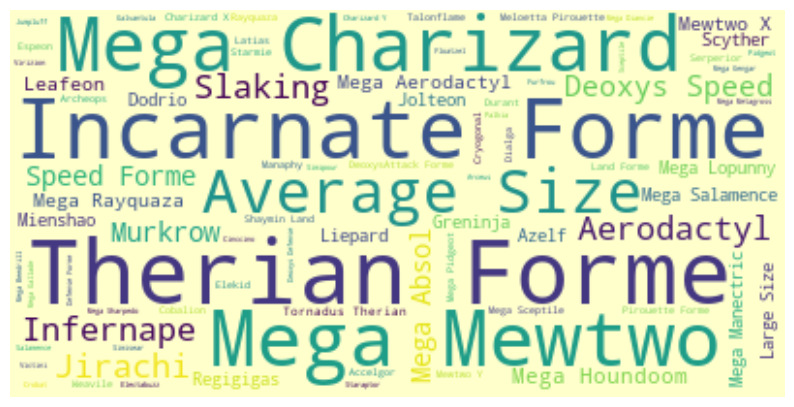

In [12]:
winners_str = [str(i) for i in winners]
winners_text = (",").join(winners_str)
#create word cloud
wc = WordCloud(background_color= "#ffffcc", random_state=12345, margin=5).generate(winners_text)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

### You may also "mask" the shape of your word cloud. Check the tutorial here https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b

### Open question: Can you create a word cloud with a page of news for today? Hint: You don't want to have a could with a big A in the center.

In [13]:
pip install spacy

     ---------------------------------------- 12.3/12.3 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 481.6/481.6 kB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
#!pip3 install -U spacy
# run the following line if you have issue with en_core_web_sm
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 5.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [25]:
topic="pokemon"
numResults=100
#sample page: https://www.google.com/search?q=pokemon&tbm=nws&hl=en&num=100
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)
response = requests.get(url)
#print(response.content)
soup = BeautifulSoup(response.content, 'html.parser')
results = soup.find_all('div', attrs = {'class': 'g'})
descriptions = []
print(results)
for result in results:
    try:
        description = result.find('div', attrs={'class':'n0jPhd ynAwRc MBeuO nDgy9d'}).get_text()
        if description != '':
            descriptions.append(description)
    except:
        print("womp womp")
        continue
text = ''.join(descriptions)
print(descriptions)
print(text)
sp = spacy.load('en_core_web_sm')
doc = sp(text)
print(doc)


[]
[]




In [20]:
newText =''
for word in doc:
    print(word)
    if word.pos_ in ['ADJ', 'NOUN']:
          newText = " ".join((newText, word.text.lower()))
print(newText)

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(newText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.